In [7]:
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'

In [8]:
import pandas as pd

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')

# Show columns and shape
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample data:\n", df.head())

# Summary stats
print("\nSummary statistics:\n", df.describe())

# Missing values
print("\nMissing values:\n", df.isna().sum())

Dataset shape: (52534, 40)
Columns: ['Datetime', 'index', 'Load', 'Solar', 'Wind', 'Net Load', 'Renewables', 'Nuclear', 'Large Hydro', 'Imports', 'Generation', 'Thermal', 'Load Less (Generation+Imports)', 'Solar Curtailment', 'Wind Curtailment', 'CO2 Emissions: COL', 'CO2 Emissions: NG', 'CO2 Emissions: OIL', 'CO2 Emissions: Other', 'CO2 Emissions Generated', 'CO2 Emissions Exported', 'CO2 Emissions Consumed', 'NG: COL', 'NG: NG', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'AZPS', 'BANC', 'BPAT', 'LDWP', 'NEVP', 'PACW', 'SRP', 'TIDC', 'WALC', 'Demand', 'Total Interchange', 'CO2 Emissions Imported']

Sample data:
              Datetime  index          Load  Solar         Wind      Net Load  \
0 2019-01-01 01:00:00      0  21953.000000    0.0  2790.333333  19162.583333   
1 2019-01-01 02:00:00      1  21203.750000    0.0  2486.000000  18717.583333   
2 2019-01-01 03:00:00      2  20620.250000    0.0  2392.416667  18227.750000   
3 2019-01-01 04:00:00      3  20296.666667    0.0  2358.58


Correlation matrix:
                    Solar Curtailment  Wind Curtailment  Load (demand)  \
Solar Curtailment           1.000000          0.652979      -0.233329   
Wind Curtailment            0.652979          1.000000      -0.145230   
Load (demand)              -0.233329         -0.145230       1.000000   
Net Load                   -0.483020         -0.313070       0.638705   
Large Hydro                -0.197673         -0.110046       0.396702   
Thermal                    -0.344122         -0.223889       0.722671   
Imports                    -0.419425         -0.274490       0.089747   

                   Net Load  Large Hydro   Thermal   Imports  
Solar Curtailment -0.483020    -0.197673 -0.344122 -0.419425  
Wind Curtailment  -0.313070    -0.110046 -0.223889 -0.274490  
Load (demand)      0.638705     0.396702  0.722671  0.089747  
Net Load           1.000000     0.480382  0.839050  0.654622  
Large Hydro        0.480382     1.000000  0.286875  0.141540  
Thermal        

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/plots/correlation_matrix.png'

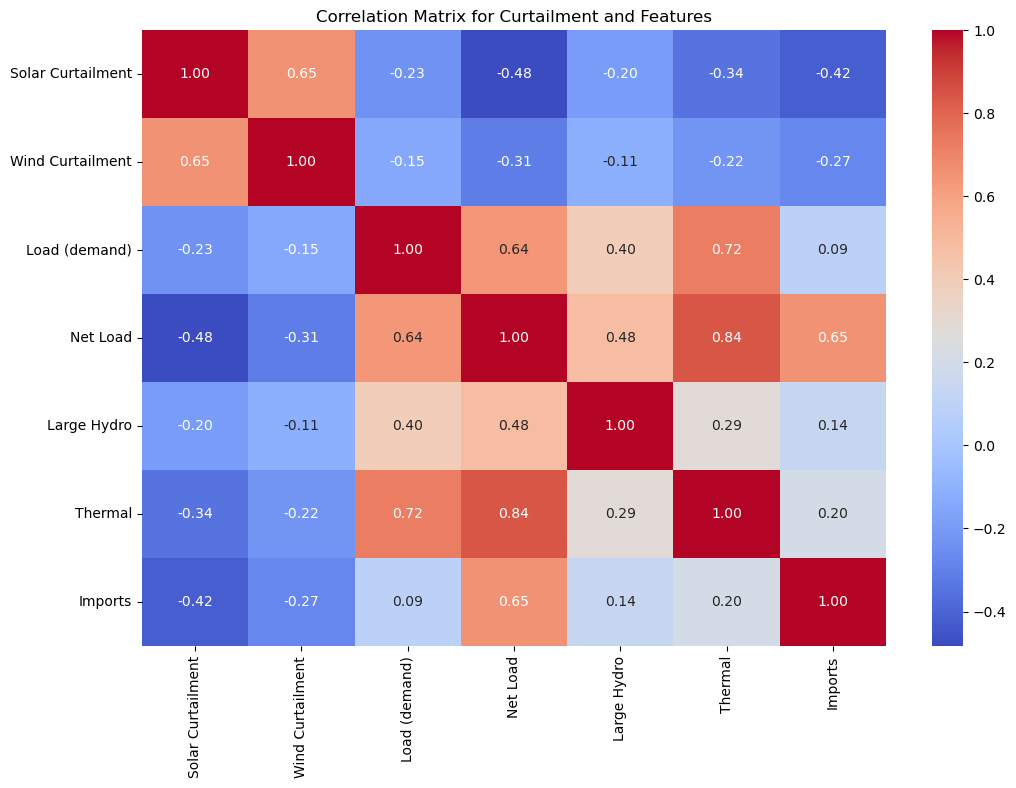

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')

# Rename Demand to Load (demand) for clarity
df = df.rename(columns={'Demand': 'Load (demand)'})

# Select numeric columns
numeric_cols = ['Solar Curtailment', 'Wind Curtailment', 'Load (demand)', 'Net Load', 'Large Hydro', 'Thermal', 'Imports']
numeric_df = df[numeric_cols].dropna()  # Drop any NAs for correlation

# Correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Curtailment and Features')
plt.savefig('outputs/plots/correlation_matrix.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/plots/autocorr_wind.png'

<Figure size 1200x600 with 0 Axes>

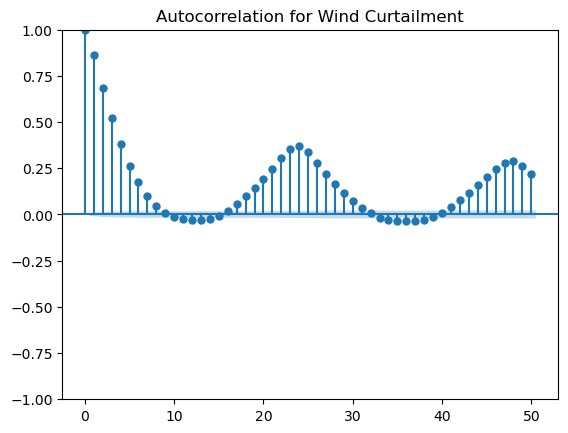

In [11]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')
df.set_index('Datetime', inplace=True)

# Autocorrelation for Wind Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Wind Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Wind Curtailment')
plt.savefig('outputs/plots/autocorr_wind.png')
plt.show()

# Autocorrelation for Solar Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Solar Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Solar Curtailment')
plt.savefig('outputs/plots/autocorr_solar.png')
plt.show()


Correlation matrix:
                    Solar Curtailment  Wind Curtailment  Load (demand)  \
Solar Curtailment           1.000000          0.652979      -0.233329   
Wind Curtailment            0.652979          1.000000      -0.145230   
Load (demand)              -0.233329         -0.145230       1.000000   
Net Load                   -0.483020         -0.313070       0.638705   
Large Hydro                -0.197673         -0.110046       0.396702   
Thermal                    -0.344122         -0.223889       0.722671   
Imports                    -0.419425         -0.274490       0.089747   

                   Net Load  Large Hydro   Thermal   Imports  
Solar Curtailment -0.483020    -0.197673 -0.344122 -0.419425  
Wind Curtailment  -0.313070    -0.110046 -0.223889 -0.274490  
Load (demand)      0.638705     0.396702  0.722671  0.089747  
Net Load           1.000000     0.480382  0.839050  0.654622  
Large Hydro        0.480382     1.000000  0.286875  0.141540  
Thermal        

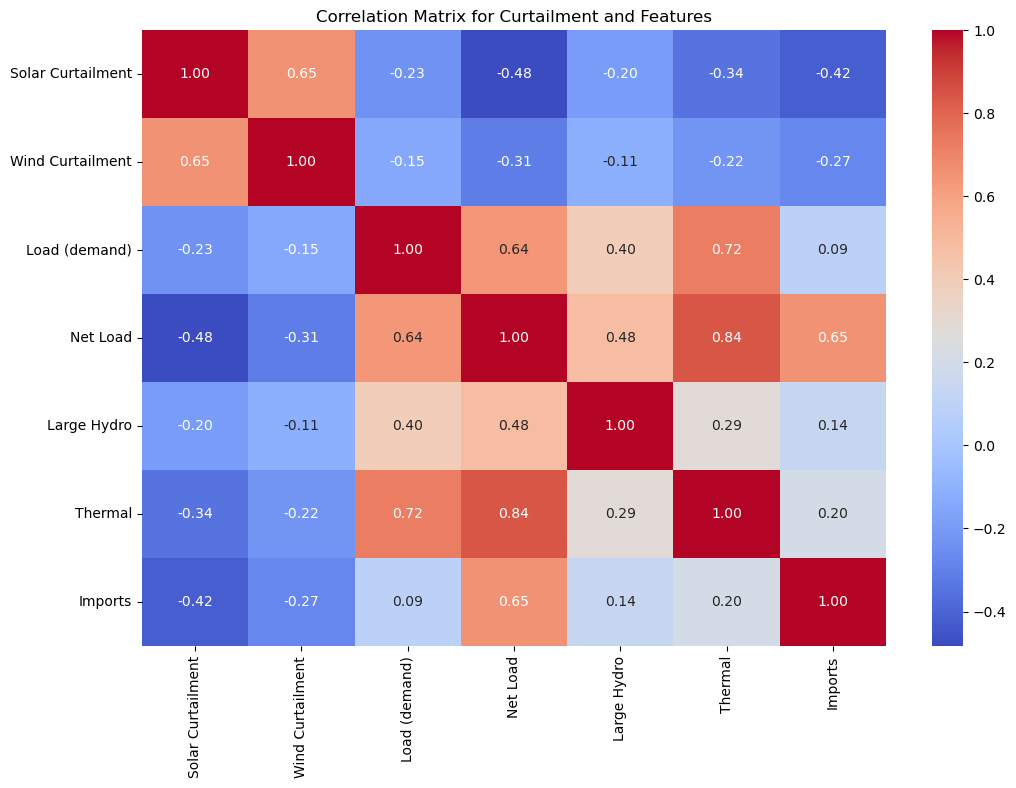

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')

# Rename Demand to Load (demand)
df = df.rename(columns={'Demand': 'Load (demand)'})

# Select numeric columns
numeric_cols = ['Solar Curtailment', 'Wind Curtailment', 'Load (demand)', 'Net Load', 'Large Hydro', 'Thermal', 'Imports']
numeric_df = df[numeric_cols].dropna()

# Correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Curtailment and Features')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\correlation_matrix.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

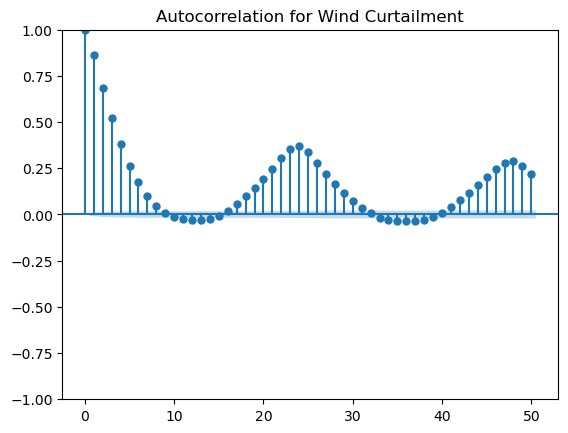

<Figure size 1200x600 with 0 Axes>

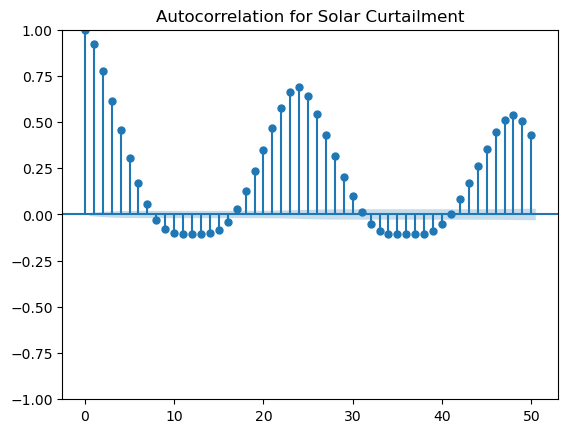

In [15]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import os

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')
df.set_index('Datetime', inplace=True)

# Autocorrelation for Wind Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Wind Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Wind Curtailment')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\autocorr_wind.png')
plt.show()

# Autocorrelation for Solar Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Solar Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Solar Curtailment')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\autocorr_solar.png')
plt.show()


Correlation matrix:
                    Solar Curtailment  Wind Curtailment  Load (demand)  \
Solar Curtailment           1.000000          0.652979      -0.233329   
Wind Curtailment            0.652979          1.000000      -0.145230   
Load (demand)              -0.233329         -0.145230       1.000000   
Net Load                   -0.483020         -0.313070       0.638705   
Large Hydro                -0.197673         -0.110046       0.396702   
Thermal                    -0.344122         -0.223889       0.722671   
Imports                    -0.419425         -0.274490       0.089747   

                   Net Load  Large Hydro   Thermal   Imports  
Solar Curtailment -0.483020    -0.197673 -0.344122 -0.419425  
Wind Curtailment  -0.313070    -0.110046 -0.223889 -0.274490  
Load (demand)      0.638705     0.396702  0.722671  0.089747  
Net Load           1.000000     0.480382  0.839050  0.654622  
Large Hydro        0.480382     1.000000  0.286875  0.141540  
Thermal        

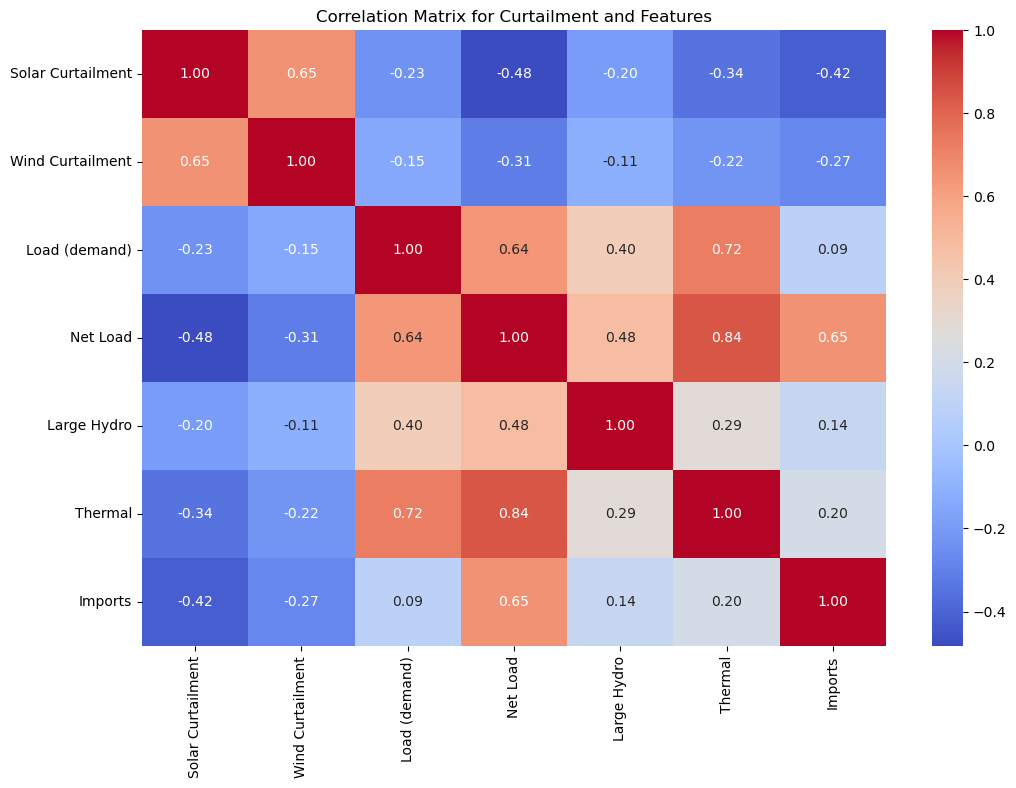

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')

# Rename Demand to Load (demand)
df = df.rename(columns={'Demand': 'Load (demand)'})

# Select numeric columns
numeric_cols = ['Solar Curtailment', 'Wind Curtailment', 'Load (demand)', 'Net Load', 'Large Hydro', 'Thermal', 'Imports']
numeric_df = df[numeric_cols].dropna()

# Correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Curtailment and Features')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\correlation_matrix.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

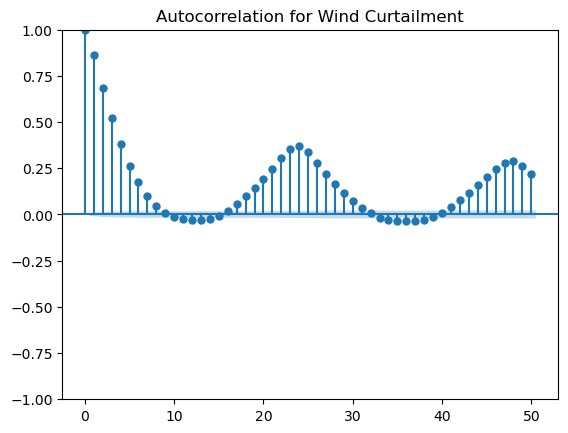

<Figure size 1200x600 with 0 Axes>

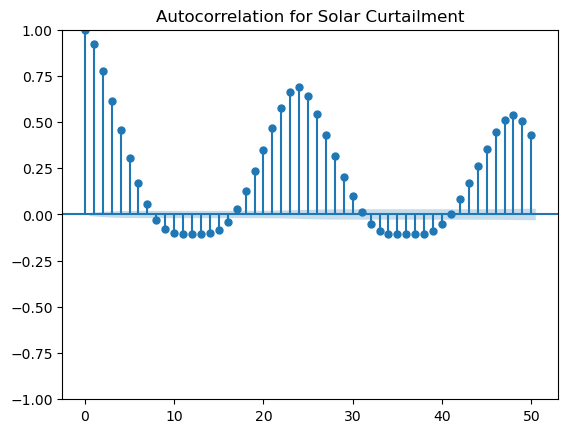

In [18]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import os

# Load dataset
dataset_path = r'C:\Users\umroot\Documents\CurtailmentForecasting\data\FINAL_MEF_CLEANED_VALIDATED_corrected_FULL.csv'
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], encoding='utf-8')
df.set_index('Datetime', inplace=True)

# Autocorrelation for Wind Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Wind Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Wind Curtailment')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\autocorr_wind.png')
plt.show()

# Autocorrelation for Solar Curtailment
plt.figure(figsize=(12, 6))
plot_acf(df['Solar Curtailment'].dropna(), lags=50)
plt.title('Autocorrelation for Solar Curtailment')
plt.savefig(r'C:\Users\umroot\Documents\CurtailmentForecasting\outputs\plots\autocorr_solar.png')
plt.show()